In [212]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from abc import ABC, abstractmethod

In [203]:
class Solver(ABC):
    """A solver. It may be initialized with some hyperparameters."""

    @abstractmethod
    def get_parameters(self):
        """Returns a dictionary of hyperparameters"""
        ...

    @abstractmethod
    def solve(self, problem, x0, *args, **kwargs):
        """
        A method that solves the given problem for given initial solution.
        It may accept or require additional parameters.
        Returns the solution and may return additional info.
        """



In [228]:
class GradientDescent(Solver):
    def __init__(self, beta, iterations):
        self.beta = beta
        self.iterations = iterations
        self.x_values = []
        self.y_values = []

    def get_parameters(self):
        dict = {}
        dict["Learning_rate"] = self.beta
        dict["Iterations"] = self.iterations
        return dict
    
    def solve(self, problem, x0, funct):
        n_iter = self.iterations
        while n_iter > 0:
           self.x_values.append(x0)
           self.y_values.append(funct(x0))
           n_iter-= 1
           d = problem(x0)
           x0 = np.subtract(x0, d * self.beta)
        return x0
    
    def set_learning_rate(self, new_beta):
        self.beta = new_beta

    def set_iterations(self, new_iter_num):
        self.iterations = new_iter_num
    
    @staticmethod
    def gradient_f1(x):
        return x**3
    
    @staticmethod
    def gradient_f2(x0):
        x1, x2 = x0
        return np.array([2 * x1 * np.exp(-x1**2 - x2**2) + (x1 - 1) * np.exp(-(x1 - 1)**2 - (x2 + 2)**2),
                        2 * x2 * np.exp(-x1**2 - x2**2) + (x2 + 2) * np.exp(-(x1 - 1)**2 - (x2 + 2)**2)])
    
    @staticmethod
    def f1(x):
        return 1/4 * x**4
    
    @staticmethod
    def f2(x):
        x1, x2 = x
        return 1.5 - np.exp(-x1**2 - x2**2) - 0.5 * np.exp(-(x1 - 1)**2 - (x2 + 2)**2)
    
    def plotter_1D(self, func, x_range=(-10, 10), num_points=400, title=None, x_label='x', y_label='y', legend_label=None):
        x = np.linspace(x_range[0], x_range[1], num_points)
        func_vectorized = np.vectorize(func)
        y = func_vectorized(x)
        plt.plot(x, y)

        for i in range(1, self.iterations):
            plt.annotate("", xy=(self.x_values[i], self.y_values[i]), xytext=(self.x_values[i-1], self.y_values[i-1]),
                                 arrowprops={'arrowstyle':"->", 'color':'r', 'lw':1}, va='center', ha='center')
            
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        if title:
            plt.title(title)
        if legend_label:
            plt.legend(legend_label)
        plt.grid(True)
        plt.show()
    
    def plotter_2D(self, func, x1_range=(-10, 10), x2_range=(-10, 10), num_points=400,
                   title=None, x1_label='x1', x2_label='x2', legend_label=None):
        #TODO: add two options of showing arrows (every arrow vs every so steps)
        x1 = np.linspace(x1_range[0], x1_range[1], num_points)
        x2 = np.linspace(x2_range[0], x2_range[1], num_points)
        X1, X2 = np.meshgrid(x1, x2)

        Z = func((X1, X2))
        plt.contourf(X1, X2, Z, cmap='viridis')
        plt.colorbar()

        for i in range(1, self.iterations):
                plt.annotate("", xy=self.x_values[i], xytext=self.x_values[i-1],
                                 arrowprops={'arrowstyle':"->", 'color':'r', 'lw':1}, va='center', ha='center')

        plt.xlabel(x1_label)
        plt.ylabel(x2_label)
        if title:
            plt.title(title)
        if legend_label:
            plt.legend(legend_label)
        
        plt.show()
        

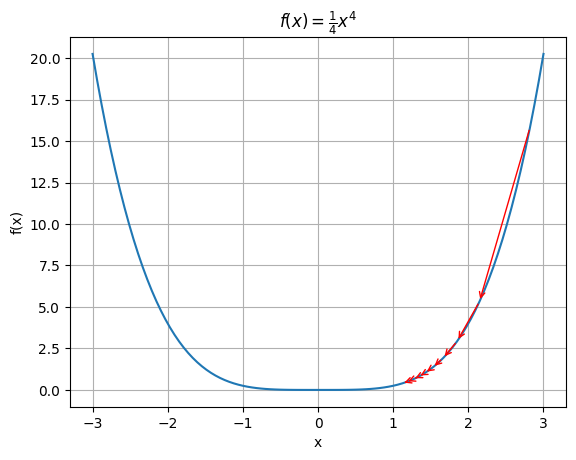

In [238]:
fx = GradientDescent(0.03, 10)
fx.solve(fx.gradient_f1, 2.82, fx.f1)
fx.plotter_1D(fx.f1, x_range=(-3,3), num_points=100, title="$f(x) = \\frac{1}{4}x^4$", y_label='f(x)')

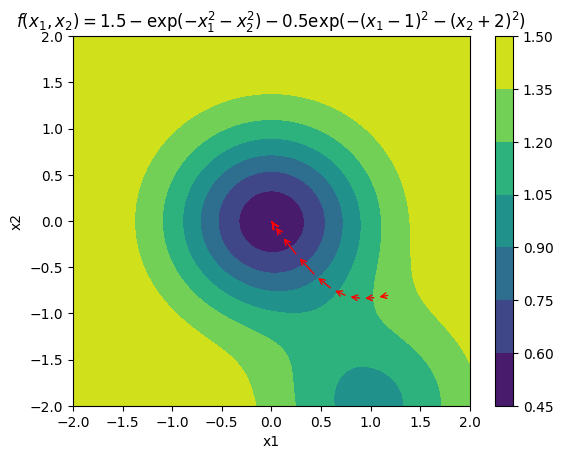

In [206]:
gx = GradientDescent(0.4, 15)
gx.solve(gx.gradient_f2, np.array([1.2, -0.8]), gx.f2)
gx.plotter_2D(gx.f2, x1_range=(-2,2), x2_range=(-2, 2), num_points=100, 
             title="$f(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

In [235]:
test_beta = [0.01, 0.03, 0.1, 0.15, 0.23, 0.25, 0.35, 0.46, 0.68]
descent_values = []
experiment_beta_fx = GradientDescent(0.01, 100)
for beta in test_beta:
    experiment_beta_fx.set_learning_rate(beta)
    descent_values.append(experiment_beta_fx.solve(experiment_beta_fx.gradient_f1, 2.79, experiment_beta_fx.f1))

table_beta_fx = {'beta' : test_beta, 'initial x0' : [2.79]*9, 'Final x' : descent_values, 'Iterations' : [100]*9}
print(tabulate(table_beta_fx, headers='keys', tablefmt='fancy_grid'))

╒════════╤══════════════╤═════════════╤══════════════╕
│   beta │   initial x0 │     Final x │   Iterations │
╞════════╪══════════════╪═════════════╪══════════════╡
│   0.01 │         2.79 │   0.678549  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.03 │         2.79 │   0.397906  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.1  │         2.79 │   0.209679  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.15 │         2.79 │  -0.169676  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.23 │         2.79 │   0.12882   │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.25 │         2.79 │   0.0714616 │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.35 │         2.79 │ nan         │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.46 │         2.79 │ nan         │          100 │
├────────┼

/tmp/ipykernel_9713/72781665.py:42: RuntimeWarning: overflow encountered in scalar power
  return 1/4 * x**4
/tmp/ipykernel_9713/72781665.py:32: RuntimeWarning: overflow encountered in scalar power
  return x**3
/tmp/ipykernel_9713/72781665.py:21: RuntimeWarning: invalid value encountered in subtract
  x0 = np.subtract(x0, d * self.beta)


In [241]:
test_iteration = [5, 10, 100, 500, 1000, 5000, 10000, 15000, 20000]
descent_values = []
experiment_iter_fx = GradientDescent(0.01, 100)
for n_iter in test_iteration:
    experiment_iter_fx.set_iterations(n_iter)
    descent_values.append(experiment_iter_fx.solve(experiment_iter_fx.gradient_f1, 2.79, experiment_iter_fx.f1))

table_beta_fx = {'Iterations' : test_iteration, 'beta' : [0.01] * 9, 'initial x0' : [2.79]*9, 'Final x' : descent_values, }
print(tabulate(table_beta_fx, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤════════╤══════════════╤═══════════╕
│   Iterations │   beta │   initial x0 │   Final x │
╞══════════════╪════════╪══════════════╪═══════════╡
│            5 │   0.01 │         2.79 │ 2.04874   │
├──────────────┼────────┼──────────────┼───────────┤
│           10 │   0.01 │         2.79 │ 1.70516   │
├──────────────┼────────┼──────────────┼───────────┤
│          100 │   0.01 │         2.79 │ 0.678549  │
├──────────────┼────────┼──────────────┼───────────┤
│          500 │   0.01 │         2.79 │ 0.313187  │
├──────────────┼────────┼──────────────┼───────────┤
│         1000 │   0.01 │         2.79 │ 0.222467  │
├──────────────┼────────┼──────────────┼───────────┤
│         5000 │   0.01 │         2.79 │ 0.0998855 │
├──────────────┼────────┼──────────────┼───────────┤
│        10000 │   0.01 │         2.79 │ 0.0706683 │
├──────────────┼────────┼──────────────┼───────────┤
│        15000 │   0.01 │         2.79 │ 0.0577114 │
├──────────────┼────────┼──────────────┼──────